In [0]:
import numpy as np
import os
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 

# %matplotlib inline
# %pylab inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

root = '/content/drive/My Drive'
data_path = os.path.join(root,'PMTs/')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
data=np.loadtxt(data_path+'SK_demo3_features.txt',skiprows=1)
# FeatureID: Column 1
# RecoWorldPosition: Columns 28-30
# Jia note: repalced "-" to tab, to parse data

In [4]:
print (data.shape)

(599, 64)


In [5]:
print (np.unique(data.T[0]))
print (np.unique(data.T[1]))

[451. 452. 453. 502. 503. 504. 553. 554. 555. 604. 605. 606. 655. 656.
 657. 706. 707. 708. 757. 758. 759. 808. 809. 810.]
[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24.]


In [0]:
PMTs = np.unique(data.T[0])
IDs, bolts, x,y,z = [data.T[i] for i in (0,1, 28,29,30)]

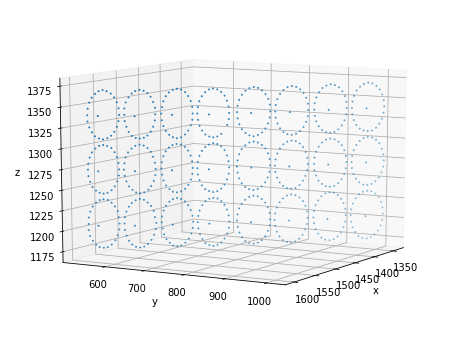

In [12]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, s=1)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(10, 30)

In [13]:
idx_test = np.where( (IDs == PMTs[0]) & (bolts!=0))
print (idx_test)

(array([24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40,
       41, 42, 43, 44, 45, 46, 47]),)


In [17]:
##### copy from https://math.stackexchange.com/questions/99299/best-fitting-plane-given-a-set-of-points
# plot raw data
xs, ys, zs = x[idx_test], y[idx_test], z[idx_test]

# do fit
tmp_A = []
tmp_b = []
for i in range(len(xs)):
    tmp_A.append([xs[i], ys[i], 1])
    tmp_b.append(zs[i])
b = np.matrix(tmp_b).T
A = np.matrix(tmp_A)
fit = (A.T * A).I * A.T * b
errors = b - A * fit
residual = np.linalg.norm(errors)

print ("solution: %f x + %f y + %f = z" % (fit[0], fit[1], fit[2]))
print ("errors:", np.array(errors).flatten() )
print ("residual:", residual)


solution: -15.942161 x + -6.641526 y + 30123.889850 = z
errors: [ 39.09228329  21.75410453   9.9222144   14.49355442   4.55037255
   1.00718233  -8.99352277 -12.7793234    0.55386651 -19.0339399
 -22.6179877   -4.00669176 -10.98331092  -3.67646543  -9.28106622
 -31.47116804 -19.84648025 -21.52800142  -1.37996471  17.4605208
   0.66153953  17.10447862  23.96006813  15.0377328 ]
residual: 83.27156487289301


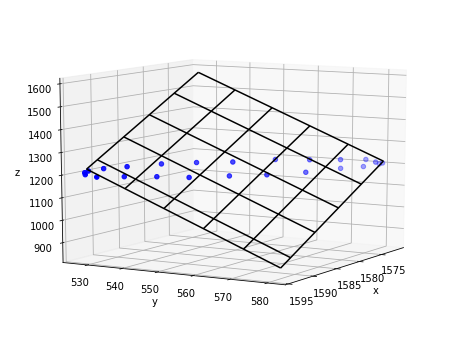

In [35]:
# plot plane
plt.figure(figsize=(8,6))
ax = plt.subplot(111, projection='3d')
ax.scatter(xs, ys, zs, color='b')

xlim = (np.amin(xs),np.amax(xs)) #ax.get_xlim()
ylim = (np.amin(ys),np.amax(ys))#ax.get_ylim()
X,Y = np.meshgrid(np.arange(xlim[0], xlim[1]),
                  np.arange(ylim[0], ylim[1]))
Z = np.zeros(X.shape)
for r in range(X.shape[0]):
    for c in range(X.shape[1]):
        Z[r,c] = fit[0] * X[r,c] + fit[1] * Y[r,c] + fit[2]
ax.plot_wireframe(X,Y,Z, color='k', rcount=5, ccount=5)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
# ax.set_zlim(1100,1300)
ax.view_init(10, 30)

In [32]:
xlim

(1570.357560647982, 1595.0532706194583)